# Modeling - COVID19 Survival Prediction

In [5]:
# import necessary library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

import os

In [6]:
# import the data set
# data is retrieved from https://www.kaggle.com/datasets/meirnizri/covid19-dataset/data
df = pd.read_csv('/Users/Angela/casestudy/Capstone_Two/data/covid_data_train.csv')
df.head()

,DEATH,PNEUMONIA,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,...,MEDICAL_UNIT_11,MEDICAL_UNIT_12,MEDICAL_UNIT_13,CLASIFFICATION_FINAL_1,CLASIFFICATION_FINAL_2,CLASIFFICATION_FINAL_3,CLASIFFICATION_FINAL_4,CLASIFFICATION_FINAL_5,CLASIFFICATION_FINAL_6,CLASIFFICATION_FINAL_7
0,1,1,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,1,0,0,0,0,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,0,1,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [7]:
X = df.drop(columns='DEATH')
y = df['DEATH']

X_scaled =  StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

# Logistic Regression

Logistic Regression

In [9]:
# fit the logistic regression model with training data

model_log = LogisticRegression(max_iter=500)
model_log.fit(X_train, y_train)
print(f'the accuracy score of logistic regression is:{round(model_log.score(X_test, y_test), 3)}')


the accuracy score of logistic regression is:0.94


In [10]:
log_pred=model_log.predict(X_test)
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97    291419
           1       0.62      0.46      0.53     23154

    accuracy                           0.94    314573
   macro avg       0.79      0.72      0.75    314573
weighted avg       0.93      0.94      0.94    314573



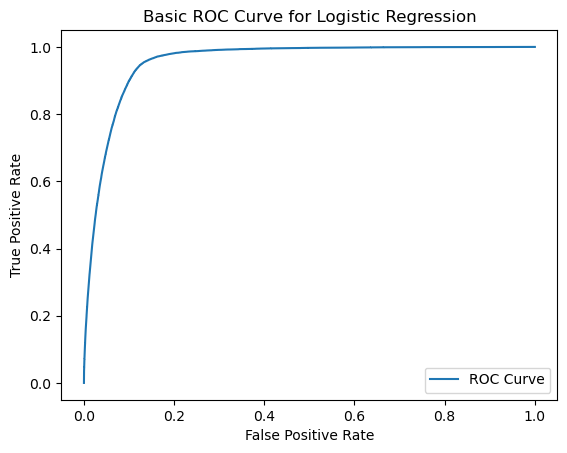

In [11]:
y_prob_log = model_log.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_log)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Basic ROC Curve for Logistic Regression')
plt.legend()
plt.show()

In [15]:
auc_score = roc_auc_score(y_test, y_prob_log)
print(f'AUC Score for Logistic Regression: {round(auc_score, 3)}')

AUC Score for Logistic Regression: 0.956


In [8]:
print(cross_val_score(model_log, X_scaled, y, cv=5))

[0.79510765 0.49822855 0.86877906 0.93736261 0.93121617]


In [9]:
# perform GridSearCV, looking for the optimal hyperparameter, the default 'solver' is 'lbfgs'

log_param = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}

log_grid = GridSearchCV(model_log, log_param, cv=5)
log_grid.fit(X_scaled, y)

print("Best Parameters:", log_grid.best_params_)
print("Best Score:", log_grid.best_score_)

Best Parameters: {'C': 0.1, 'penalty': 'l2'}
Best Score: 0.8134430059843121


In [67]:
# change solver to 'newton-cholesky'
log_param_2 = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}

log_grid_2 = GridSearchCV(LogisticRegression(max_iter=500, solver = 'newton-cg'), log_param_2, cv=5)
log_grid_2.fit(X_scaled, y)

print("Best Parameters:", log_grid_2.best_params_)
print("Best Score:", log_grid_2.best_score_)

Best Parameters: {'C': 0.1, 'penalty': 'l2'}
Best Score: 0.8137310159025345


# Random Forest

In [21]:
rfc = RandomForestClassifier(random_state = 24)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96    291419
           1       0.55      0.46      0.50     23154

    accuracy                           0.93    314573
   macro avg       0.75      0.72      0.73    314573
weighted avg       0.93      0.93      0.93    314573



In [19]:
print(f'the accuracy score of Random Forest is:{round(rfc.score(X_test, y_test), 3)}')

the accuracy score of Random Forest is:0.933


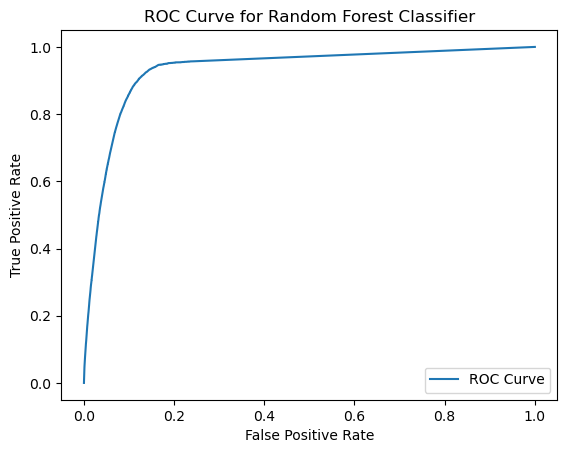

In [17]:
y_prob_rfc = rfc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rfc)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend()
plt.show()

In [18]:
auc_score_rfc = roc_auc_score(y_test, y_prob_rfc)
print(f'AUC Score for Random Forest Classifier: {round(auc_score_rfc, 3)}')

AUC Score for Random Forest Classifier: 0.932


In [22]:
rfc_params = {"max_depth" : [4,5,6,7], "min_samples_split" : [2,3,5],
              "min_samples_leaf" : [1,2,3,4]}

rf_grid = GridSearchCV(rfc, rfc_params, cv = 5 )
rf_grid.fit(X_scaled, y)
rf_grid.best_params_

KeyboardInterrupt: 

# Gradient Boosting Classifier

In [8]:
gbc = GradientBoostingClassifier(random_state = 21)
gbc.fit(X_train,y_train)
y_pred = gbc.predict(X_test)

print(f'the accuracy score of Gradient Boosting Classifier:{round(gbc.score(X_test, y_test), 3)}')
print(classification_report(y_test, y_pred))

the accuracy score of Gradient Boosting Classifier:0.941
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    291419
           1       0.63      0.47      0.54     23154

    accuracy                           0.94    314573
   macro avg       0.80      0.72      0.75    314573
weighted avg       0.93      0.94      0.94    314573



In [23]:
gbc_params = {
  "max_depth"  : [3,4,5,6],
  "learning_rate": [0.05, 0.1, 0.2, 0.5]
    
}
gbc_grid = GridSearchCV(gbc, gbc_params,cv = 5)
gbc_grid.fit(X_scaled, y)
gbc_grid.best_params_

KeyboardInterrupt: 

# XG Boosting

In [16]:
model_xgb = XGBClassifier(random_state = 42,  objective='binary:logistic')
model_xgb.fit(X_train,y_train)
_y_pred = model_xgb.predict(X_test)

print(f'the accuracy score of XG Boosting:{round(model_xgb.score(X_test, y_test), 3)}')
print(classification_report(y_test,_y_pred))

the accuracy score of XG Boosting:0.942
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    291419
           1       0.64      0.47      0.54     23154

    accuracy                           0.94    314573
   macro avg       0.80      0.72      0.76    314573
weighted avg       0.94      0.94      0.94    314573



In [17]:
xgb_params = {
  "max_depth"  : [2,4,5,6],
  "learning_rate": [0.1, 0.2, 0.5, 1],
    
}
xgb_grid = GridSearchCV(model_xgb, xgb_params, cv=5)
xgb_grid.fit(X_scaled, y)
xgb_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 2}

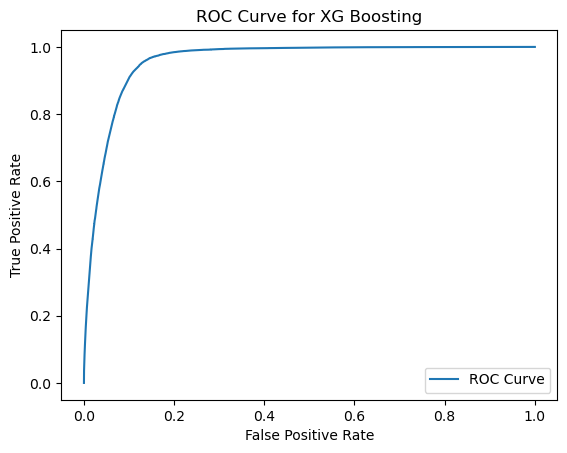

In [19]:
y_prob_xgb= model_xgb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_xgb)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XG Boosting')
plt.legend()
plt.show()

In [20]:
auc_score_xgb = roc_auc_score(y_test, y_prob_xgb)
print(f'AUC Score for Random Forest Classifier: {round(auc_score_xgb, 3)}')

AUC Score for Random Forest Classifier: 0.958
